In [47]:
import pandas.io.data as web
import datetime
import numpy as np
import matplotlib.pyplot as plt
from statsmodels import regression
import statsmodels.api as sm

%matplotlib inline  

In [5]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2015, 9, 25)

# Texas Instruments Incorporated (NASDAQ:TXN)
txn = web.DataReader("TXN", 'yahoo', start, end)

# Hormel Foods Corp (NYSE:HRL)
hrl = web.DataReader("HRL", 'yahoo', start, end)

In [6]:
index = web.DataReader("SPY", 'yahoo', start, end)

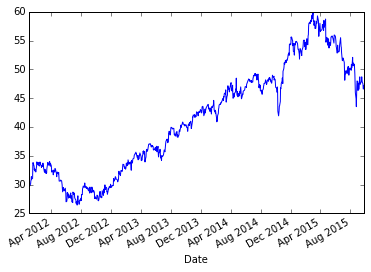

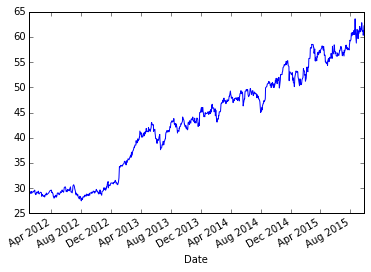

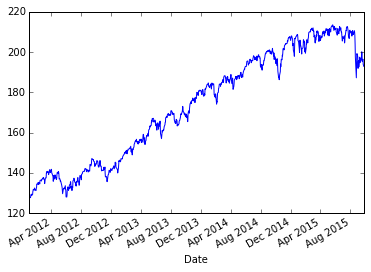

"\nfig, axes = plt.subplots(1,3)\n\ntxn['Close'].plot(ax=axes[0])\naxes[0].set_title('Texas Instrument (NASDAQ:TXN)')\n\nhrl['Close'].plot(ax=axes[1])\naxes[1].set_title('Hormel Foods (NYSE:HRL)')\n\nindex['Close'].plot(ax=axes[2])\naxes[2].set_title('SPY')\n"

In [35]:

txn['Close'].plot()
plt.show()

hrl['Close'].plot()
plt.show()

index['Close'].plot()
plt.show()

'''
fig, axes = plt.subplots(1,3)

txn['Close'].plot(ax=axes[0])
axes[0].set_title('Texas Instrument (NASDAQ:TXN)')

hrl['Close'].plot(ax=axes[1])
axes[1].set_title('Hormel Foods (NYSE:HRL)')

index['Close'].plot(ax=axes[2])
axes[2].set_title('SPY')
'''

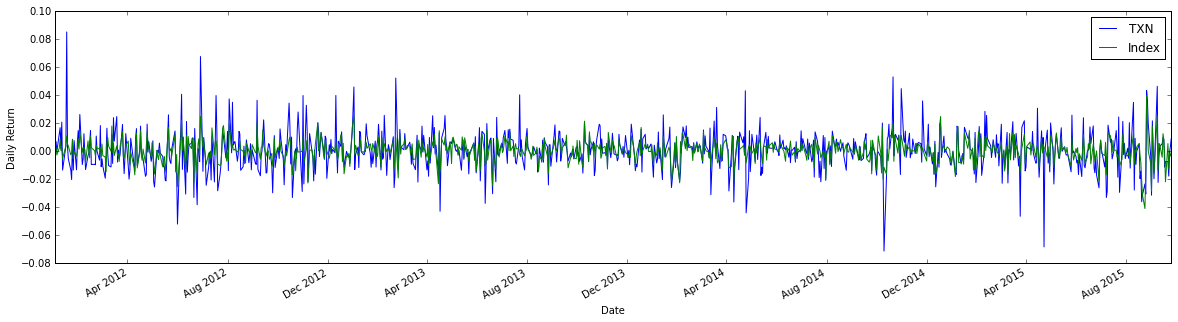

In [38]:
plt.figure(figsize=(20,5))
txn['Close'].pct_change()[1:].plot(label='TXN')
index['Close'].pct_change()[1:].plot(label='Index')

plt.ylabel('Daily Return')
plt.legend()
plt.show()

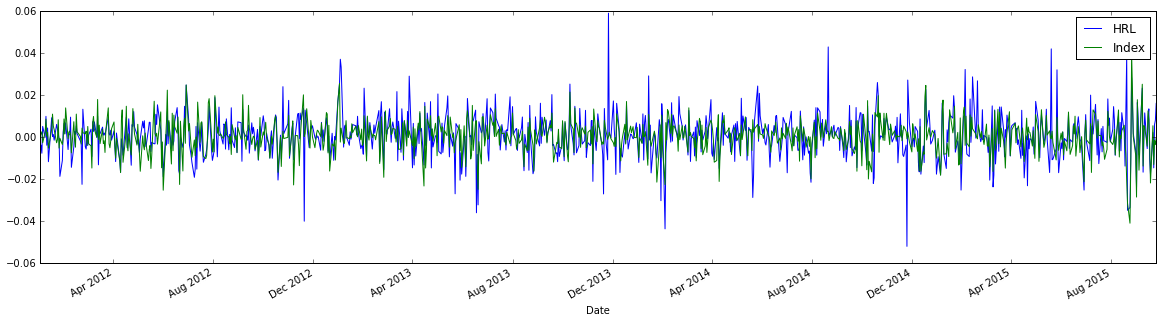

In [36]:
plt.figure(figsize=(20,5))
hrl['Close'].pct_change()[1:].plot(label='HRL')
index['Close'].pct_change()[1:].plot(label='Index')
plt.legend()
plt.show()

In [33]:
print ('TXN Corr: ', txn['Close'].pct_change().corr(index['Close'].pct_change()))
print ('HRL Corr: ', hrl['Close'].pct_change().corr(index['Close'].pct_change()))

TXN Beta:  0.702377769815
HRL Beta:  0.566198502579


Now we can perform the regression to find $\alpha$ and $\beta$:

In [42]:
def linreg(x,y):
    # We add a constant so that we can also fit an intercept (alpha) to the model
    # This just adds a column of 1s to our data
    x = sm.add_constant(x)
    print(x[1:5])
    model = regression.linear_model.OLS(y,x).fit()
    # Remove the constant now that we're done
    x = x[:, 1]
    return model.params[0], model.params[1]

In [48]:
# Let's define everything in familiar regression terms
X = hrl['Close'].pct_change()[1:].values # Get just the values, ignore the timestamps
Y = index['Close'].pct_change()[1:].values

alpha, beta = linreg(X,Y)
print('alpha: ', str(alpha))
print('beta: ', str(beta))

[[ 1.         -0.00756794]
 [ 1.          0.00519931]
 [ 1.          0.        ]
 [ 1.          0.01000003]]
alpha:  0.000105827873867
beta:  0.425333422859


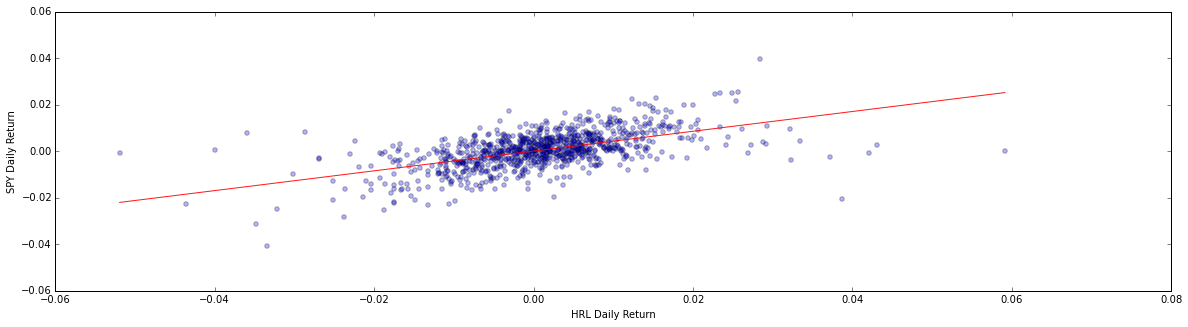

In [54]:
X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * beta + alpha

plt.figure(figsize=(20,5))
plt.scatter(X, Y, alpha=0.3) # Plot the raw data
plt.xlabel("HRL Daily Return")
plt.ylabel("SPY Daily Return")

plt.plot(X2, Y_hat, 'r', alpha=0.9);  # Add the regression line, colored in red